In [89]:
# library imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [90]:
# Data loading

df = pd.read_csv('/content/HRDataset.csv')
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [91]:
# initual exploration
df.shape

(311, 36)

In [92]:
# check column names, and type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [93]:
#  statistics of the data set
df.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


In [94]:
df.describe(include='object')

,Employee_Name,Position,State,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,RecruitmentSource,PerformanceScore,LastPerformanceReview_Date
count,311,311,311,311,311,311,311,311,311,311,104,311,311,311,311,311,311,311
unique,311,32,28,307,2,5,3,4,6,101,96,18,3,6,21,9,4,137
top,"Adinolfi, Wilson K",Production Technician I,MA,09/09/65,F,Single,US Citizen,No,White,1/10/2011,8/19/2018,N/A-StillEmployed,Active,Production,Michael Albert,Indeed,Fully Meets,1/14/2019
freq,1,137,276,2,176,137,295,282,187,14,2,207,207,209,22,87,243,18


In [95]:
# check for missing values, shows only colums with missing values
df.isnull().sum()[df.isnull().sum() > 0]

,0
DateofTermination,207
ManagerID,8


The **207 missing values** in the **DateofTermination** column indicate that these employees are **still currently employed** by the company.

In [96]:
# explore the missing values in ManagerID
df.loc[df['ManagerID'].isnull(),'ManagerName']

,ManagerName
19,Webster Butler
30,Webster Butler
44,Webster Butler
88,Webster Butler
135,Webster Butler
177,Webster Butler
232,Webster Butler
251,Webster Butler


**All missing values** in the **ManagerID** column correspond to employees managed by **Webster Butler**.

In [97]:
# let's try to find the ID of manager Webster Butler
df[df['ManagerName'] == 'Webster Butler'][['ManagerName', 'ManagerID']]

,ManagerName,ManagerID
4,Webster Butler,39.0
19,Webster Butler,NaN
30,Webster Butler,NaN
44,Webster Butler,NaN
65,Webster Butler,39.0
88,Webster Butler,NaN
89,Webster Butler,39.0
105,Webster Butler,39.0
124,Webster Butler,39.0
135,Webster Butler,NaN


Good news! Based on the result above the **missing ManagerID is 39**.

In [98]:
# check the data type of ManagerID column
type(df['ManagerID'][0])

numpy.float64

In [99]:
# Handle missing values
df.loc[(df['ManagerName'] == 'Webster Butler') & (df['ManagerID'].isnull()), 'ManagerID'] = 39.0

In [100]:
#  double check for missing values in ManagerID column
df['ManagerID'].isnull().sum()

0

In [101]:
# convert the data type of ManagerID column from float to int
df['ManagerID'] = df['ManagerID'].astype(int)

In [102]:
# double check data type of ManagerID column
type(df['ManagerID'][0])

numpy.int64

In [103]:
# lets see the date containing columns
df[['DOB', 'DateofHire', 'DateofTermination', 'LastPerformanceReview_Date']]

,DOB,DateofHire,DateofTermination,LastPerformanceReview_Date
0,07/10/83,7/5/2011,NaN,1/17/2019
1,05/05/75,3/30/2015,6/16/2016,2/24/2016
2,09/19/88,7/5/2011,9/24/2012,5/15/2012
3,09/27/88,1/7/2008,NaN,1/3/2019
4,09/08/89,7/11/2011,9/6/2016,2/1/2016
...,...,...,...,...
306,05/11/85,7/7/2014,NaN,2/28/2019
307,05/04/82,9/2/2008,9/29/2015,9/2/2015
308,08/30/79,4/10/2010,NaN,2/21/2019
309,02/24/79,3/30/2015,NaN,2/1/2019


Based on the subset above, the columns '**DateofHire', 'DateofTermination', and 'LastPerformanceReview_Date'** all follow the **date format 'M/DD/YYYY**'. In contrast, the **'DOB' column** uses a different format, **'MM/DD/YY'**. Consequently, the preprocessing of these columns will need to be handled separately to account for their differing date structures.

In [104]:
# create a date parser
def date_parser(date_str):
    try:
        date = datetime.strptime(date_str, '%m/%d/%y')

        if date.year > datetime.now().year:
            return date.replace(year=date.year - 100)
        return date
    except ValueError:
        return pd.NaT

In [105]:
# Handle 'DOB' column (format: MM/DD/YY), data type conversion str -> datetime
df['DOB'] = pd.to_datetime(df['DOB'].astype(str).apply(date_parser), errors='coerce')


In [108]:
# check the result from the data conversion
df.DOB.head(10)

,DOB
0,1983-07-10
1,1975-05-05
2,1988-09-19
3,1988-09-27
4,1989-09-08
5,1977-05-22
6,1979-05-24
7,1983-02-18
8,1970-02-11
9,1988-01-07


In [109]:
# convert all other date columns from data type str to datetime
date_columns = ['DateofHire', 'DateofTermination', 'LastPerformanceReview_Date']

for col in date_columns:
    df[col] = pd.to_datetime(df[col], format='%m/%d/%Y', errors='coerce')


In [110]:
# check results from data conversion
df[date_columns].head(10)

,DateofHire,DateofTermination,LastPerformanceReview_Date
0,2011-07-05,NaT,2019-01-17
1,2015-03-30,2016-06-16,2016-02-24
2,2011-07-05,2012-09-24,2012-05-15
3,2008-01-07,NaT,2019-01-03
4,2011-07-11,2016-09-06,2016-02-01
5,2012-01-09,NaT,2019-01-07
6,2014-11-10,NaT,2019-01-02
7,2013-09-30,NaT,2019-02-25
8,2009-07-06,NaT,2019-01-25
9,2015-01-05,NaT,2019-02-18


In [111]:
# check the whole dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Employee_Name               311 non-null    object        
 1   EmpID                       311 non-null    int64         
 2   MarriedID                   311 non-null    int64         
 3   MaritalStatusID             311 non-null    int64         
 4   GenderID                    311 non-null    int64         
 5   EmpStatusID                 311 non-null    int64         
 6   DeptID                      311 non-null    int64         
 7   PerfScoreID                 311 non-null    int64         
 8   FromDiversityJobFairID      311 non-null    int64         
 9   Salary                      311 non-null    int64         
 10  Termd                       311 non-null    int64         
 11  PositionID                  311 non-null    int64         

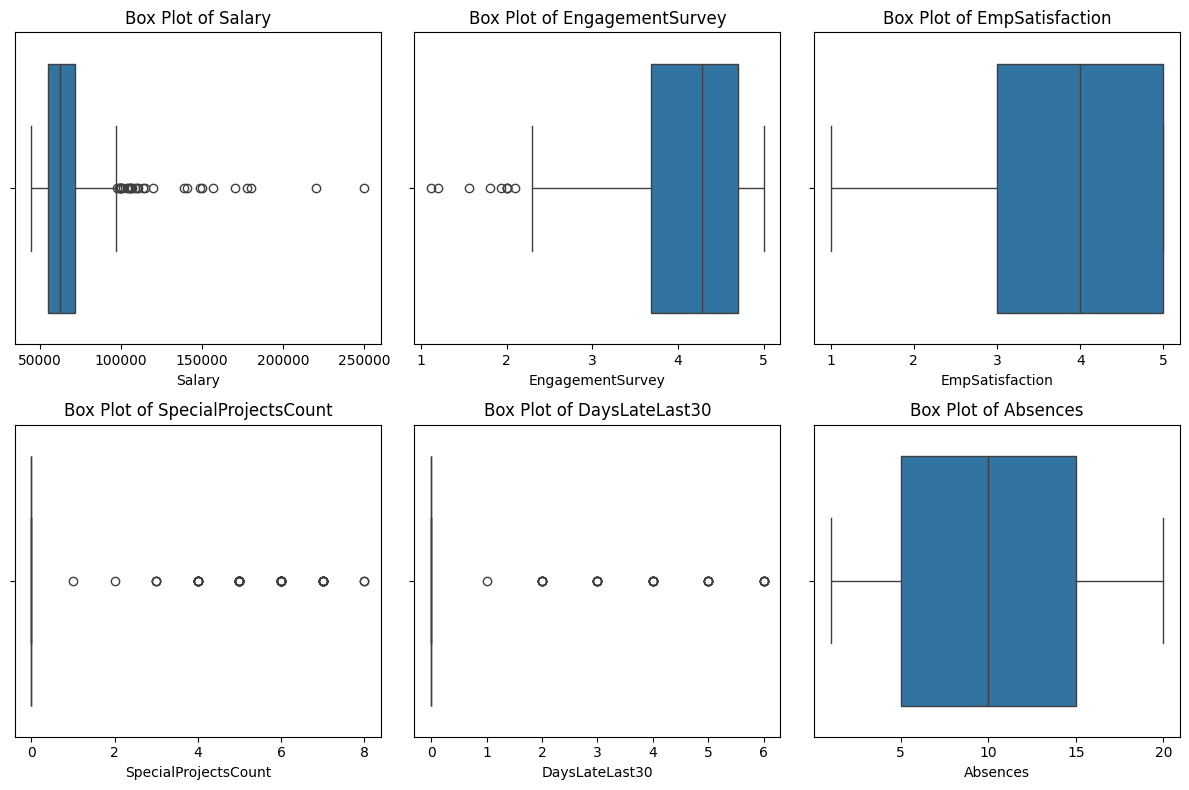

In [112]:
# Check numerical columns for outliers
numerical_columns = ['Salary', 'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount', 'DaysLateLast30', 'Absences']

plt.figure(figsize=(12, 8))

# Create box plots for each numerical column
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x=col)
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

**Feature Engineering**

In [113]:
current_date = datetime.now()

In [114]:
print("Current date used for calculation:", current_date)

Current date used for calculation: 2024-08-26 15:59:02.682121


In [118]:
# create new columns
df['Age'] = ((current_date - df['DOB']).dt.days / 365.25).apply(np.floor).astype(int)
df['AgeAtHiring'] = ((df['DateofHire'] - df['DOB']).dt.days / 365.25).apply(np.floor).astype(int)
df['Tenure'] = ((df['DateofTermination'].fillna(current_date) - df['DateofHire']).dt.days / 365.25).round().astype(int)
df['YearsSinceLastReview'] = ((current_date - df['LastPerformanceReview_Date']).dt.days / 365.25).round().astype(int)

In [119]:
# view new columns
df[['Age','AgeAtHiring','Tenure','YearsSinceLastReview']].head(10)

,Age,AgeAtHiring,Tenure,YearsSinceLastReview
0,41,27,13,6
1,49,39,1,9
2,35,22,1,12
3,35,19,17,6
4,34,21,5,9
5,47,34,13,6
6,45,35,10,6
7,41,30,11,6
8,54,39,15,6
9,36,26,10,6


**Exploratory Data Analysis (EDA)**


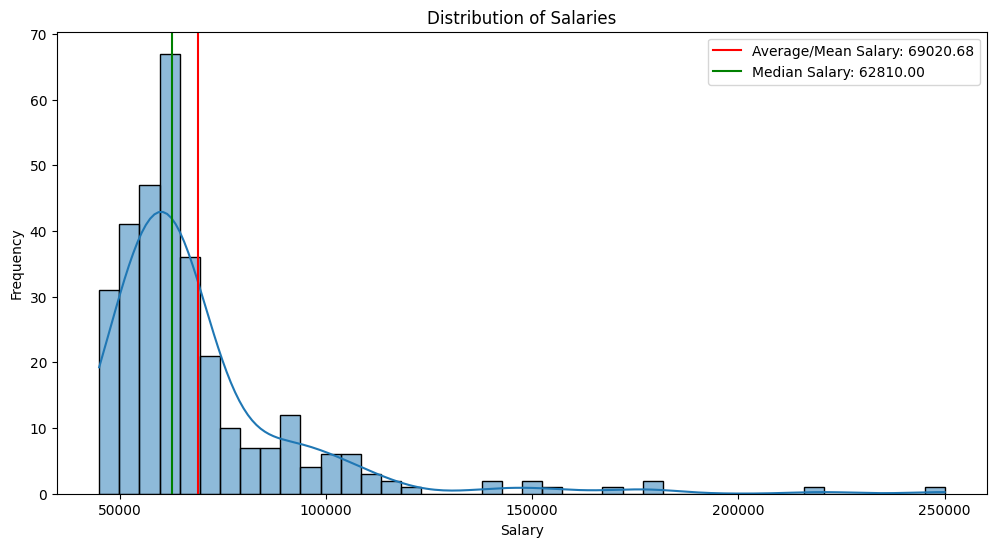

In [128]:
# Distribution of Salaries
plt.figure(figsize=(12, 6))
sns.histplot(df['Salary'], kde=True)
plt.axvline(df['Salary'].mean(), color='r', label=f'Average/Mean Salary: {df["Salary"].mean():.2f}')
plt.axvline(df['Salary'].median(), color='g', label = f'Median Salary: {df["Salary"].median():.2f}')
plt.legend()
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Salaries')
plt.show()

The salary distribution in the dataset shows considerable variation, with a **right-skewed distribution**.
This skew implies that **a portion of employees earn significantly higher salaries**, pulling the mean (69,020.68) upwards compared to the median(62,810.00). Specifically, the presence of a maximum salary as high as $250,000.00 indicates outliers or high earners in the dataset.
This distribution should be considered when evaluating salary equity and making compensation decisions.

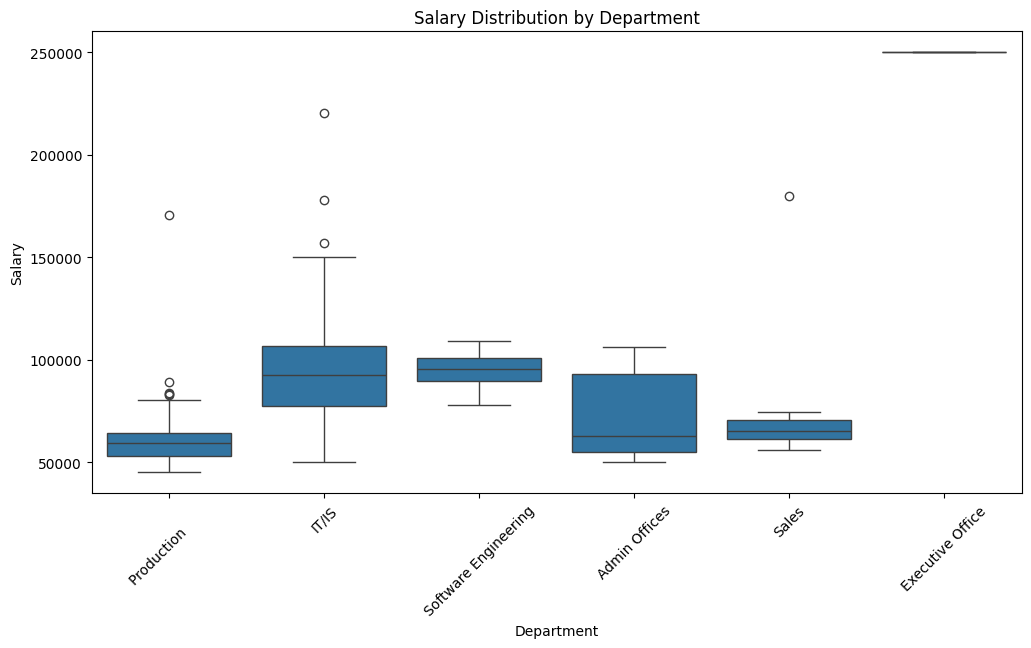

In [129]:
# Salary Distribution by Department
plt.figure(figsize=(12, 6))
sns.boxplot(x='Department', y='Salary', data=df)
plt.title('Salary Distribution by Department')
plt.xticks(rotation=45)
plt.show()

**Insights:**

**Production** salaries are relatively close to the **median (59,472.00)** with a broad range at the upper end. The **average (59,953.55)** is slightly higher than the median, suggesting that higher salaries are pulling up the average. The **maximum salary (170,500)** is considerably higher than the 75th percentile (64,066.00), indicating possible outliers or specialized roles with high compensation.

The **IT/IS department** exhibits a high **average salary (97,064.64)** with significant variability. The **maximum salary (220,450.00)** is notably higher than the 75th percentile (106,844.50), suggesting the presence of high earners or potential outliers . The wide range between the 25th (77,417.75) and 75th percentiles indicates a diverse salary structure.

**Software Engineering** shows high **average (94,989.45)** and **median (95,660.00)** salaries with a relatively narrow range between the 25th (89,601.50) and 75th (100,807.50) percentiles, suggesting consistent compensation levels. The **maximum salary (108,987.00)** is higher than the 75th percentile, indicating the presence of high earners.

The **Admin Offices** show a considerable salary range with a **maximum salary ($106,367.00)** that is significantly higher than the **median (63,003.00)**. The **average salary (71,791.89)** is higher than the median, suggesting a few high earners could be skewing the average. The gap between the 25th (55,000.00) and 75th (93,046.00) percentiles indicates variability within this department.

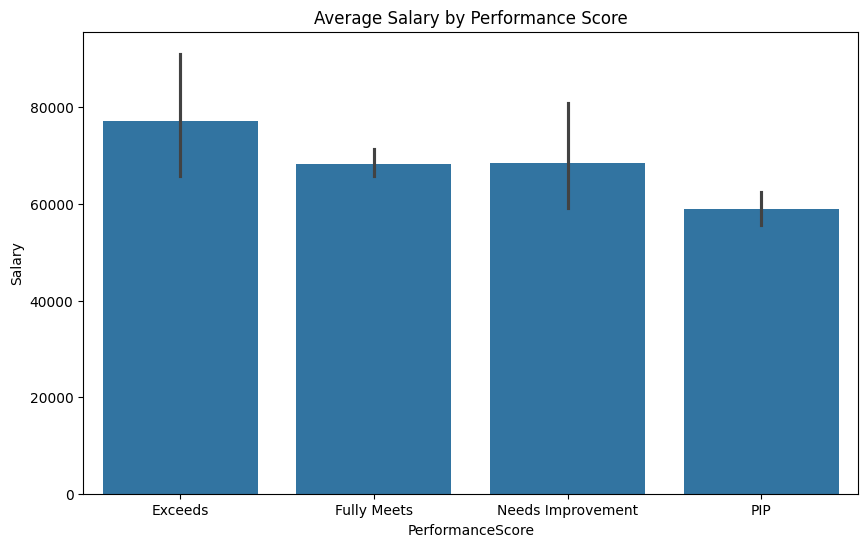

In [130]:
# Average Salary by Performance Score
plt.figure(figsize=(10, 6))
sns.barplot(x='PerformanceScore', y='Salary', data=df)
plt.title('Average Salary by Performance Score')
plt.show()

In [ ]:
# Distribution of Employee Tenure
plt.figure(figsize=(12, 6))
sns.histplot(df['Tenure'], kde=True, bins=20)
plt.title('Distribution of Employee Tenure')
plt.xlabel('Tenure (Years)')
plt.ylabel('Count')
plt.show()

In [ ]:
# Performance Score vs Tenure
plt.figure(figsize=(12, 6))
sns.boxplot(x='PerformanceScore', y='Tenure', data=df)
plt.title('Performance Score vs Tenure')
plt.xlabel('Performance Score')
plt.ylabel('Tenure (Years)')
plt.show()